# Reconstructing Missing Data
## 链接：
https://ww2.mathworks.cn/help/signal/ug/reconstructing-missing-data.html

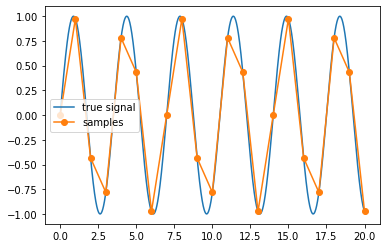

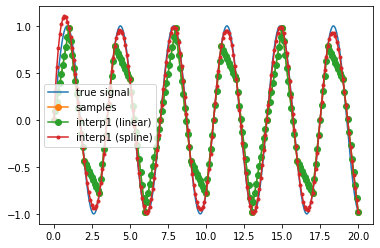

In [1]:
# coding utf-8

from scipy.io import loadmat
import numpy as np
from numpy import ndarray
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


def get_data(data_path, isplot=True):
    data = loadmat(data_path)
    t_true = data['tTrueSignal'].squeeze()
    x_true = data['xTrueSignal'].squeeze()
    t_resampled = data['tResampled'].squeeze()

    # 对数据进行抽取(间隔100抽样)
    t_sampled = t_true[::100]
    x_sampled = x_true[::100]
    if isplot:
        # 绘制数据对比图1
        plt.figure(1)
        plt.plot(t_true, x_true, '-', label='true signal')
        plt.plot(t_sampled, x_sampled, 'o-', label='samples')
        plt.legend()
        plt.show()

    return t_true, x_true, t_sampled, x_sampled, t_resampled


def data_interp(t, x, t_resampled, method_index):
    if method_index == 1:
        # 返回一个拟合的函数(线性插值)
        fun = interp1d(t, x, kind='linear')
    elif method_index == 2:
        # 返回一个拟合的函数(三次样条插值)
        fun = interp1d(t, x, kind='cubic')
    else:
        raise Exception("未知的方法索引,请检查!")
    # 计算值
    x_inter = fun(t_resampled)
    return x_inter


def result_visiualize(x_inter_1, x_inter_2):
    # 加载数据
    t_true, x_true, t_sampled, x_sampled, t_resampled = get_data("./data.mat", isplot=False)
    plt.figure(2)
    plt.plot(t_true, x_true, '-', label='true signal')
    plt.plot(t_sampled, x_sampled, 'o-', label='samples')
    plt.plot(t_resampled, x_inter_1, 'o-', label='interp1 (linear)')
    plt.plot(t_resampled, x_inter_2, '.-', label='interp1 (spline)')
    plt.legend()
    plt.show()


if __name__ == '__main__':
    # 加载数据
    t_true, x_true, t_sampled, x_sampled, t_resampled = get_data("./data.mat")
    # 进行插值
    x_inter_1 = data_interp(t_sampled, x_sampled, t_resampled, method_index=1)
    x_inter_2 = data_interp(t_sampled, x_sampled, t_resampled, method_index=2)
    # 绘制图片
    result_visiualize(x_inter_1, x_inter_2)
